# Volume 4: Introduction to Initial Value Problems and Boundary Value Problems

In [1]:
import numpy as np
from scipy.integrate import solve_ivp
from scipy.integrate import solve_bvp
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

### Problem 1
Use solve_ivp to solve for $y$ in the equation $y'' - y = sin(t)$ with initial conditions $y(0)= -\frac{1}{2}$, $y'(0) = 0$ and plot your solution on the interval $[0,5]$. Compare this to the analytic solution $y=-\frac{1}{2}(e^{-t}+sin(t))$. 

Note: Using max_step = 0.1 with give you a smoother graph here

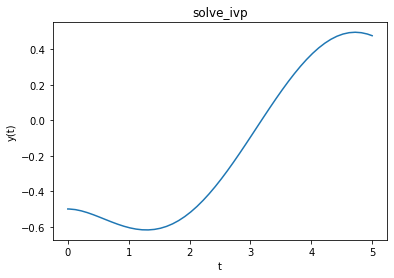

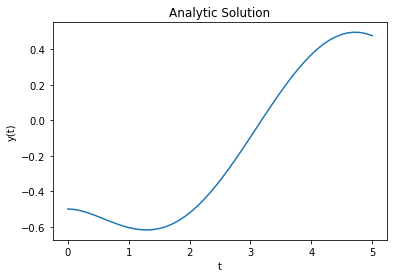

In [2]:
def prob1(t,y):
    return np.array([y[1],np.sin(t)+y[0]])

t_span = (0,5)
y_0 = np.array([-1/2,0])
sol = solve_ivp(prob1,t_span,y_0,max_step=.1)

# plot solve_ivp solution #######################################################
plt.plot(sol.t,sol.y[0])
plt.title("solve_ivp")
plt.xlabel('t')
plt.ylabel('y(t)')
plt.show()
          
# plot analytic solution ########################################################
x = np.linspace(0,5,50)
plt.plot(x, (np.e**-x + np.sin(x))/-2)
plt.title("Analytic Solution")
plt.xlabel('t')
plt.ylabel('y(t)')
plt.show()

### Problem 2

Use solve_bvp to solve for $y$ in the equation $y'+y''=-\frac{1}{4}e^{-0.5t}+sin(t)-cos(t)$ with boundary conditions $y(0)=6$ and $y'(5)=-0.324705$ and plot your solution on the interval $[0,5]$. Use an initial guess of all ones. Compare this to the analytic solution $y =e^{-0.5t}-sin(t)+5$. 

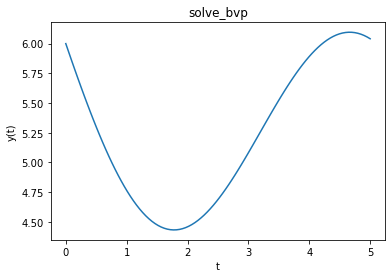

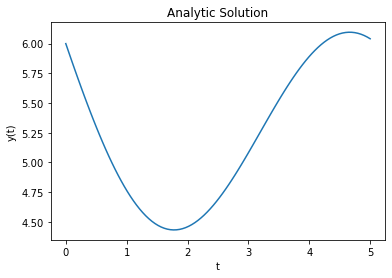

In [3]:
def prob2(t,y):
    return np.array([y[1], -np.e**(-.5*t)/4 + np.sin(t) - np.cos(t) - y[1]])

def bc2(y_a,y_b):
    return np.array([y_a[0]-6,y_b[1]+.324705])

y_0 = np.ones((2,100))
t = np.linspace(0,5,100)
sol = solve_bvp(prob2,bc2,t,y_0)

# plot solve_bvp solution #######################################################
plt.plot(sol.x,sol.y[0])
plt.title("solve_bvp")
plt.xlabel('t')
plt.ylabel('y(t)')
plt.show()    

# plot analytic solution ########################################################      
plt.plot(t, (np.e**(-.5*t) - np.sin(t) + 5))
plt.title("Analytic Solution")
plt.xlabel('t')
plt.ylabel('y(t)')
plt.show()

### Problem 3

Use solve_bvp to solve for $y$ in the equation $y''=(1-y')*10y$ with boundary conditions $y(0)=-1$ and $y(1)=\frac{3}{2}$ and plot your solution on the interval $[0,1]$. Use an initial guess of 10. Compare this to the the same solution using an initial guess of 9.99. 

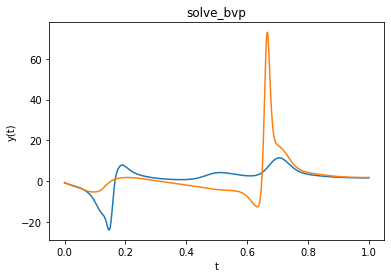

In [4]:
def prob3(t,y):
    return np.array([y[1], (1-y[1])*10*y[0]])


def bc3(y_a,y_b):
    return np.array([y_a[0]+1,y_b[0]-(3/2)])

# calculate solutions ####################################################
y_0 = np.ones((2,50))*10
y_0a = np.ones((2,50))*9.99
t = np.linspace(0,1,50)
sol = solve_bvp(prob3,bc3,t,y_0)
sol_2 = solve_bvp(prob3,bc3,t,y_0a)

# plot solutions #########################################################
plt.plot(sol.x,sol.y[0])
plt.title("solve_bvp")
plt.xlabel('t')
plt.ylabel('y(t)')
plt.plot(sol_2.x,sol_2.y[0])
plt.title("solve_bvp")
plt.xlabel('t')
plt.ylabel('y(t)')
plt.show()              

### Problem 4
Use solve_ivp to solve the Four-Wing Attractor as described in equations (1.2), (1.3), and (1.4) where $a=0.2$, $b = 0.01$, and $c = -0.4$. Try this with 3 different initial values and plot (in three dimensions) the 3 corresponding graphs.

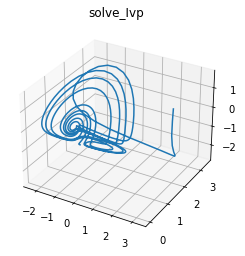

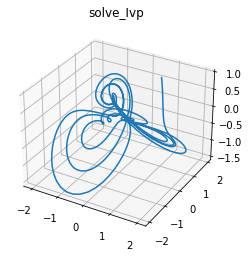

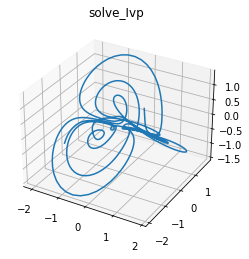

In [5]:
def prob3(t,y):
    return np.array([.2*y[0] + y[1]*y[2], .01*y[0] + -.4 *y[1] - y[0]*y[2], -y[2] - y[1]*y[0]])

# calculate solutions ####################################################
t_span = (0,200)

y_0 = np.array([3,2,1])
y_1 = np.array([1,1,1])
y_2 = np.array([.5,.5,.5])

sol = solve_ivp(prob3,t_span,y_0,max_step=.1)
sol_2= solve_ivp(prob3,t_span,y_1,max_step=.1)
sol_3= solve_ivp(prob3,t_span,y_2,max_step=.1)

# make 1st plot ##########################################################
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot3D(sol.y[0],sol.y[1],sol.y[2])
plt.title("solve_Ivp")
plt.show()

# make 2nd plot ##########################################################
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot3D(sol_2.y[0],sol_2.y[1],sol_2.y[2])
plt.title("solve_Ivp")
plt.show()

# make 3rd plot ##########################################################
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot3D(sol_3.y[0],sol_3.y[1],sol_3.y[2])
plt.title("solve_Ivp")
plt.show()